# ECG Signal Processing - Variant 2

In [1]:
!pip install wfdb biosppy neurokit2

     ---------------------------------------- 0.0/74.8 kB ? eta -:--:--
     --------------------- ------------------ 41.0/74.8 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 74.8/74.8 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/163.8 kB ? eta -:--:--
   --------------------------- ------------ 112.6/163.8 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 163.8/163.8 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/158.0 kB ? eta -:--:--
   ------------------------------- -------- 122.9/158.0 kB ? eta -:--:--
   ---------------------------------------- 158.0/158.0 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/693.1 kB ? eta -:--:--
   ----------- --------------------------- 204.8/693.1 kB 13.0 MB/s eta 0:00:01
   ------------------------ --------------- 419.8/693.1 kB 6.6 MB/s eta 0:00:01
   --------------------------------- ------ 583.7/693.1 kB 5.3 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import neurokit2 as nk

## 3. Parametry Symulacji

In [3]:
# Czas trwania i częstotliwość próbkowania
duration = 10        # seconds
fs = 500             # Hz (sampling rate)

# Filtr pasmowy: dolna 1 Hz, górna 35 Hz
lowcut = 1.0         # Hz
highcut = 35.0       # Hz
order = 4     

 ## 4. Generacja i Filtrowanie Sygnału ECG

4.1. Symulacja sygnału ECG

In [4]:
ecg_signal = nk.ecg_simulate(duration=duration, sampling_rate=fs)

4.2. Definicja filtru pasmowego

In [5]:
def bandpass_filter(signal, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, signal)

4.3. Filtrowanie sygnału

In [6]:
ecg_filtered = bandpass_filter(ecg_signal, lowcut, highcut, fs, order)

## 5. Wizualizacja Sygnału

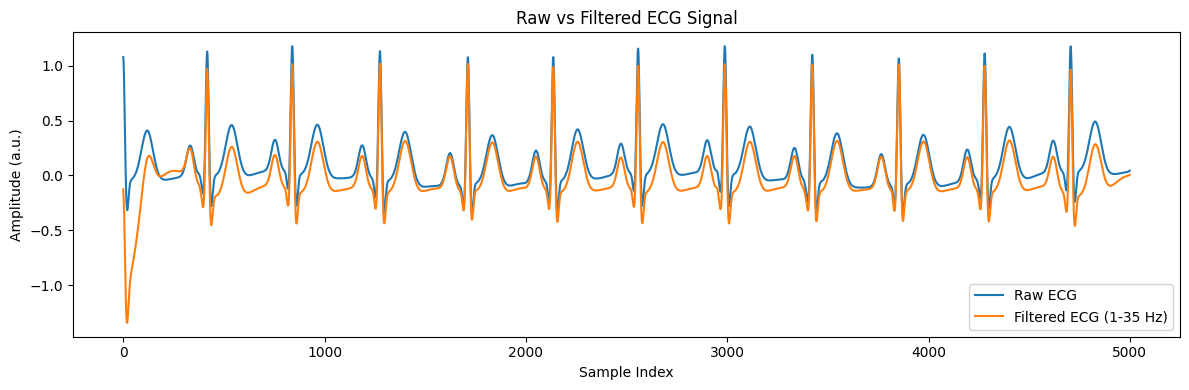

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(ecg_signal, label='Raw ECG')
plt.plot(ecg_filtered, label='Filtered ECG (1-35 Hz)')
plt.title('Raw vs Filtered ECG Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (a.u.)')
plt.legend()
plt.tight_layout()
plt.show()

## 6. Wykrywanie R-peaków

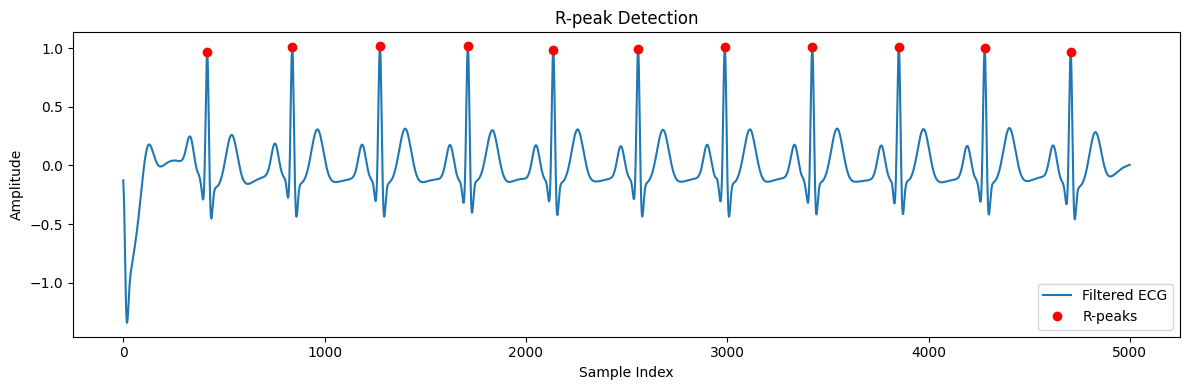

In [8]:
signals, info = nk.ecg_process(ecg_filtered, sampling_rate=fs)
r_peaks = info['ECG_R_Peaks']

plt.figure(figsize=(12, 4))
plt.plot(ecg_filtered, label='Filtered ECG')
plt.plot(r_peaks, ecg_filtered[r_peaks], 'ro', label='R-peaks')
plt.title('R-peak Detection')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

 ## 7. Obliczanie Częstości Serca (Instantaneous Heart Rate)

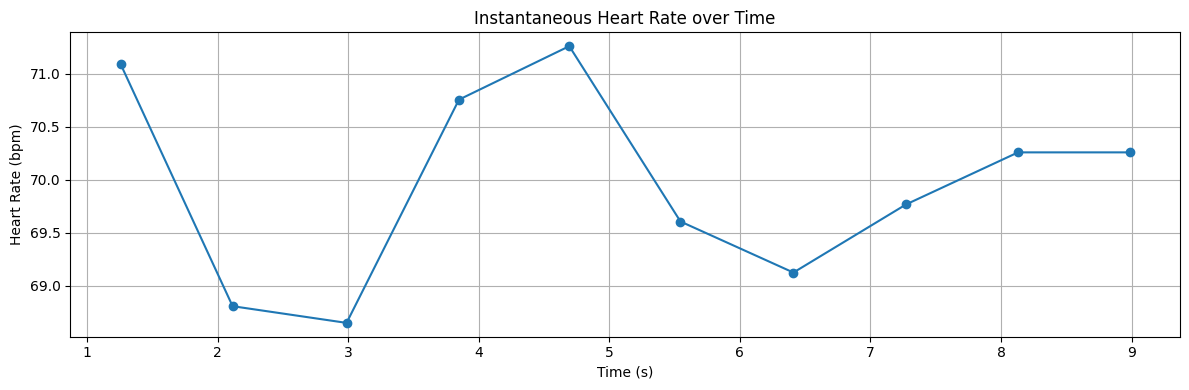

In [9]:

# Indeksy w próbkach -> czasy w sekundach
r_times = np.array(r_peaks) / fs
# RR-intervals w sekundach
rr_intervals = np.diff(r_times)
# HR instantaneous (bpm)
hr_inst = 60 / rr_intervals
# Czasy przypisane do HR jako środek przedziału RR
time_hr = r_times[:-1] + rr_intervals / 2

plt.figure(figsize=(12, 4))
plt.plot(time_hr, hr_inst, marker='o')
plt.title('Instantaneous Heart Rate over Time')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.tight_layout()
plt.show()